In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Customer_Segmentation_Py.csv',encoding='latin-1')

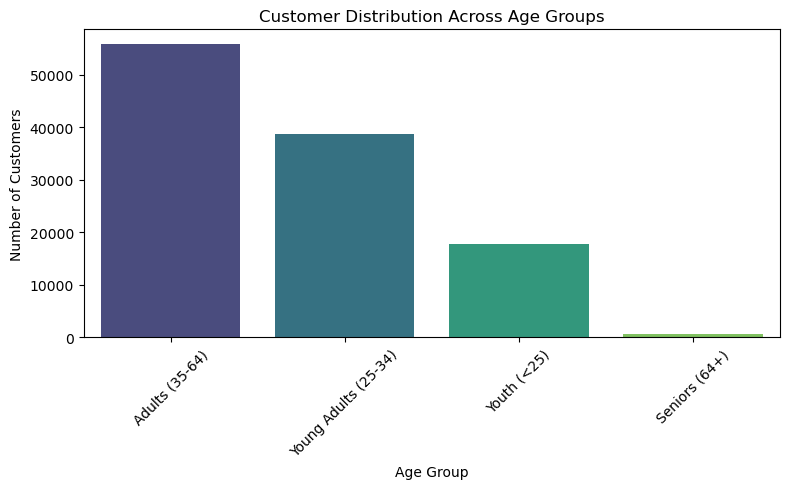

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Age_Group', order=df['Age_Group'].value_counts().index, palette='viridis')
plt.title('Customer Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

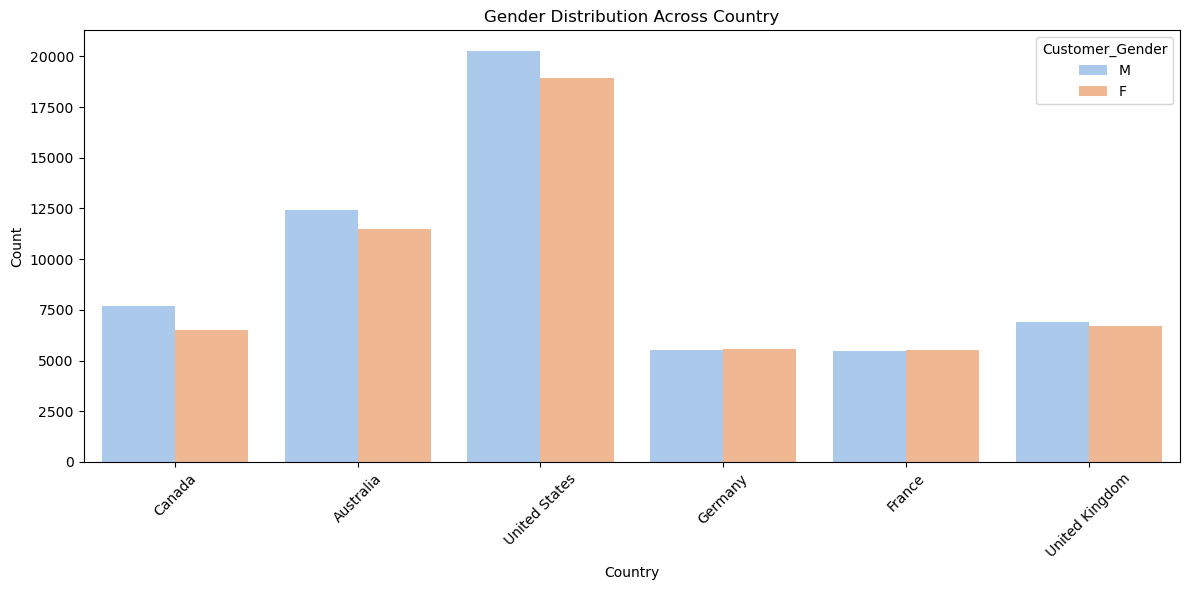

In [4]:
location_col = 'Country' if 'Country' in df.columns else 'State'  # Choose based on available column
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=location_col, hue='Customer_Gender', palette='pastel')
plt.title(f'Gender Distribution Across {location_col}')
plt.xlabel(location_col)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

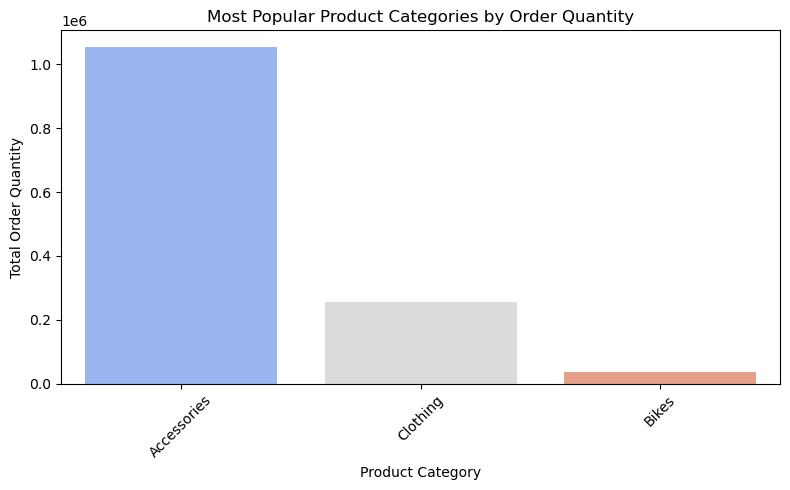

In [5]:
category_order_qty = df.groupby('Product_Category')['Order_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=category_order_qty.index, y=category_order_qty.values, palette='coolwarm')
plt.title('Most Popular Product Categories by Order Quantity')
plt.ylabel('Total Order Quantity')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
subcat_order_qty = df.groupby('Sub_Category')['Order_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=subcat_order_qty.index, y=subcat_order_qty.values, palette='coolwarm')
plt.title('Most Popular Sub-Categories by Order Quantity')
plt.ylabel('Total Order Quantity')
plt.xlabel('Sub-Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('Customer_Segmentation_Py.csv')

In [ ]:
features = ['Order_Quantity', 'Profit', 'Revenue']  # Adjust if your column names differ
customer_data = df[features].dropna()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [ ]:
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print("Cluster Characteristics:\n", cluster_summary)

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=1000)
plt.title('Customer Segments (PCA Projection)')
plt.tight_layout()
plt.show()

In [ ]:
category_profit = df.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_profit.index, y=category_profit.values, palette='Blues')
plt.title('Total Profit by Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
subcategory_profit = df.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=subcategory_profit.index, y=subcategory_profit.values, palette='Purples')
plt.title('Total Profit by Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
category_revenue = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='Greens')
plt.title('Total Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
subcategory_revenue = df.groupby('Sub_Category')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=subcategory_revenue.index, y=subcategory_revenue.values, palette='Oranges')
plt.title('Total Revenue by Sub-Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 9))
sns.scatterplot(data=df, x='Unit_Cost', y='Profit', hue='Product_Category', palette='Set2')
plt.title('Unit Cost vs Profit')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 9))
sns.scatterplot(data=df, x='Unit_Price', y='Profit', hue='Product_Category', palette='Set1')
plt.title('Unit Price vs Profit')
plt.tight_layout()
plt.show()

In [ ]:
corr_features = ['Unit_Cost', 'Unit_Price', 'Profit']
plt.figure(figsize=(6, 4))
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation: Unit Cost, Unit Price, Profit')
plt.tight_layout()
plt.show()

In [ ]:
age_revenue_profit = df.groupby('Age_Group')[['Revenue', 'Profit']].sum().sort_values(by='Revenue', ascending=False)


In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=age_revenue_profit.index, y=age_revenue_profit['Revenue'].values, palette='Blues_d')
plt.title('Total Revenue by Age Group')
plt.ylabel('Revenue')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=age_revenue_profit.index, y=age_revenue_profit['Profit'].values, palette='Greens_d')
plt.title('Total Profit by Age Group')
plt.ylabel('Profit')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
gender_revenue = df.groupby('Customer_Gender')['Revenue'].sum().sort_values(ascending=False)


In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_revenue.index, y=gender_revenue.values, palette='Set2')
plt.title('Revenue by Customer Gender')
plt.ylabel('Total Revenue')
plt.xlabel('Customer Gender')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Customer_Gender', y='Revenue', palette='pastel')
plt.title('Distribution of Revenue by Gender')
plt.ylabel('Revenue')
plt.xlabel('Customer Gender')
plt.tight_layout()
plt.show()

In [ ]:
df

In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Quantity'])

In [ ]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.to_period('M').astype(str)  # Format: YYYY-MM

In [ ]:
monthly_data = df.groupby('Month')[['Revenue', 'Profit']].sum().reset_index()

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=monthly_data, x='Month', y='Revenue', label='Revenue', marker='o')
sns.lineplot(data=monthly_data, x='Month', y='Profit', label='Profit', marker='s')
plt.title('Monthly Revenue and Profit Trends')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
yearly_data = df.groupby('Year')[['Revenue', 'Profit']].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=yearly_data, x='Year', y='Revenue', color='skyblue', label='Revenue')
sns.barplot(data=yearly_data, x='Year', y='Profit', color='lightgreen', label='Profit', alpha=0.7)
plt.title('Yearly Revenue and Profit')
plt.ylabel('Amount')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df['High_Order'] = (df['Order_Quantity'] > df['Order_Quantity'].median()).astype(int)


In [ ]:
features = ['Customer_Gender', 'Age_Group', 'Product_Category', 'Sub_Category']
X = df[features]
y = df['High_Order']


In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
features = ['Customer_Gender', 'Age_Group', 'Product_Category', 'Sub_Category',
            'Order_Quantity', 'Unit_Cost', 'Unit_Price']
X = df[features]
y = df['Profit']

In [ ]:
X = pd.get_dummies(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

In [ ]:
y_pred = reg.predict(X_test_scaled)

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

In [ ]:
if 'Country' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index, palette='viridis')
    plt.title('Customer Distribution by Country')
    plt.xlabel('Number of Customers')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()


In [ ]:
if 'Country' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index, palette='viridis')
    plt.title('Customer Distribution by Country')
    plt.xlabel('Number of Customers')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

if 'State' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='State', data=df, order=df['State'].value_counts().index, palette='magma')
    plt.title('Customer Distribution by State')
    plt.xlabel('Number of Customers')
    plt.ylabel('State')
    plt.tight_layout()
    plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
category_revenue = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='coolwarm')
plt.title('Total Revenue by Product Category')
plt.ylabel('Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
category_profit = df.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=category_profit.index, y=category_profit.values, palette='coolwarm')
plt.title('Total Profit by Product Category')
plt.ylabel('Profit')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
features = ['Order_Quantity', 'Profit', 'Revenue']
customer_data = df[features].dropna()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)


In [ ]:
df.loc[customer_data.index, 'Cluster'] = clusters


In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=clusters, palette='Set2', s=60)
plt.title('Customer Clusters Based on Purchasing Behavior')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()